# 1. Import Library

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pprint import pprint
from time import time

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 2. Data Understanding dan Data Preparation

**Data Loading**

*   Kami akan menggunakan dataset [Credit Bank Customer](https://drive.google.com/file/d/1mKzLNhO2sRQGTzmqnNEjWpZeODgC2sCt/view?usp=sharing) yang diambil dari [Kaggle](https://www.kaggle.com/code/paulinan/bank-customer-segmentation/data)
*   Dataset ini merupakan data nasabah yang melakukan credit kepada suatu bank.


## 2.1 Exploratory Data Analysis


In [56]:
#mengunggah data
df_cust=pd.read_csv('/content/german_credit_data.csv') 
df_cust #menampilkan data, nama datanya adalah 'df_cust'

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [57]:
df_cust.head() #menampilkan 5 baris pertama pada data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [58]:
df_cust.tail() #menampilkan 5 baris terakhir pada data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [59]:
df_cust.shape #mengetahui ukuran data

(1000, 10)

### Exploratory Data Analysis: All Data dan Data non Numerik

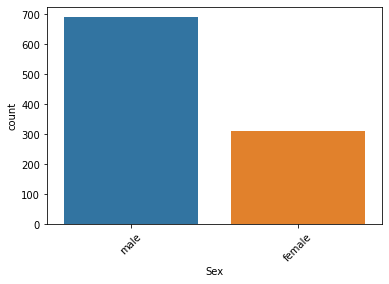

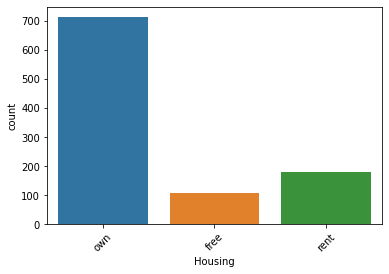

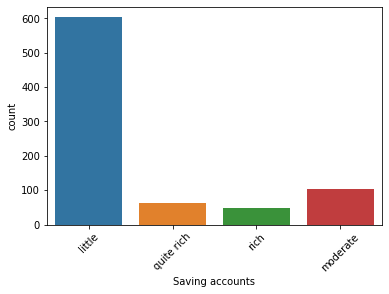

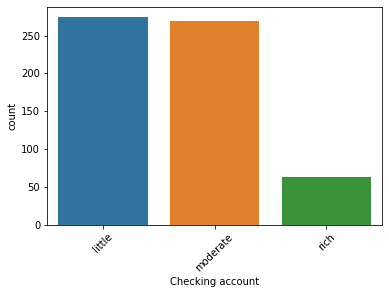

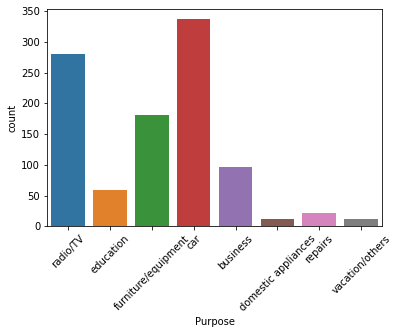

In [60]:
# melihat jumlah masing-masing value pada features categorical
features_categorical= ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for f in features_categorical:
  sns.countplot(x=f, data=df_cust)
  plt.xticks(rotation=45)
  plt.show()

In [61]:
# melihat missing value dan tipe data masing-masing variabel
print("Database memiliki {} data customer and {} kolom variabel.".format(df_cust.shape[0],df_cust.shape[1]))
print("Missing values masing-masing kolom:\n{}".format(df_cust.isnull().sum()))
print("Tipe data kolom:\n{}".format(df_cust.dtypes))

Database memiliki 1000 data customer and 10 kolom variabel.
Missing values masing-masing kolom:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Tipe data kolom:
Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


**Insight**

Terdapat missing values yaitu pada variabel Saving accounts dan Checking account. Namun hal ini tidak menjadi masalah karena Saving accounts dan Checking account merupakan hal yang tidak bersifat wajib dalam pengajuan credit. Kemungkinan adanya missing values ini disebabkan terdapat nasabah yang tidak memiliki akun tersebut.


---



---



In [62]:
# melihat jumlah unique value masing-masing variabel
n_unique = df_cust.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64


### Exploratory Data Analysis: Data Numerik

Data yang akan digunakan dalam pengklasteran ini adalah data yang bersifat numerik, yaitu data yang memuat variabel Age (umur), Credit amount (jumlah kredit), dan Duration (durasi kredit).

In [63]:
df_num=df_cust[['Age','Credit amount', 'Duration']] #df_num=data numerik
df_num

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [64]:
df_num.shape #melihat ukuran dari data numerik

(1000, 3)

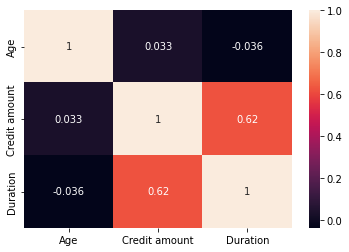

In [65]:
# melihat korelasi antar variabel dalam data numerik
sns.heatmap(df_num.corr(), annot=True)
plt.show()

**Insight**

Credit amount dengan durasi memiliki korelasi yang cukup tinggi yaitu sebesar 0.62, artinya ketika nilai credit amount-nya tinggi, maka nilai durasinya juga cenderung tinggi (berbanding lurus).


---



---



In [66]:
#melihat statistics summary
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [67]:
# mendefinisikan fungsi untuk memanggil boxplot

def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

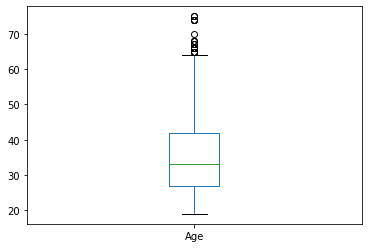

In [68]:
plot_boxplot(df_num, 'Age')

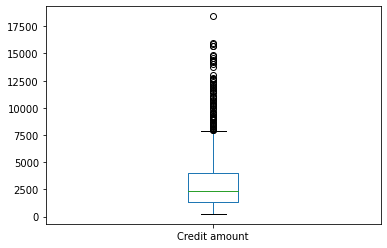

In [69]:
plot_boxplot(df_num, 'Credit amount')

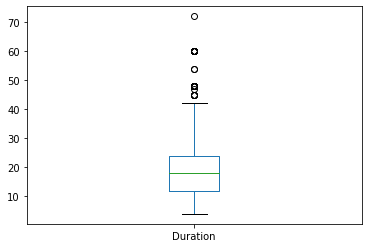

In [70]:
plot_boxplot(df_num, 'Duration')

### Menghapus outliers

In [71]:
# mendefinisikan fungsi untuk memanggil 'outliers' 
# IQR=Q3-Q1
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  batas_bawah= Q1- 1.5 * IQR
  batas_atas= Q3+1.5*IQR

  ls=df.index[(df[ft]< batas_bawah) | (df[ft] > batas_atas)]

  return ls


In [72]:
index_list=[]
for feature in ['Age', 'Credit amount', 'Duration']:
  index_list.extend(outliers(df_num, feature))

In [73]:
index_list

[0,
 75,
 137,
 163,
 179,
 186,
 187,
 213,
 330,
 430,
 438,
 536,
 554,
 606,
 624,
 723,
 756,
 774,
 779,
 807,
 846,
 883,
 917,
 5,
 17,
 18,
 57,
 63,
 70,
 78,
 87,
 95,
 105,
 130,
 134,
 136,
 180,
 205,
 226,
 236,
 268,
 272,
 274,
 285,
 291,
 295,
 304,
 333,
 373,
 374,
 378,
 381,
 395,
 402,
 417,
 431,
 450,
 491,
 496,
 509,
 525,
 549,
 563,
 615,
 616,
 637,
 645,
 653,
 657,
 672,
 684,
 714,
 736,
 744,
 763,
 771,
 805,
 808,
 812,
 818,
 828,
 832,
 854,
 881,
 887,
 895,
 902,
 915,
 917,
 921,
 927,
 945,
 953,
 980,
 983,
 1,
 11,
 29,
 35,
 36,
 44,
 63,
 78,
 95,
 115,
 130,
 134,
 145,
 191,
 194,
 226,
 242,
 255,
 272,
 273,
 285,
 286,
 287,
 294,
 295,
 304,
 310,
 332,
 333,
 373,
 374,
 375,
 444,
 467,
 522,
 538,
 549,
 552,
 568,
 569,
 615,
 616,
 622,
 637,
 650,
 657,
 667,
 672,
 677,
 685,
 701,
 706,
 714,
 728,
 787,
 788,
 813,
 814,
 829,
 832,
 887,
 915,
 921,
 927,
 938,
 945,
 973,
 981,
 998,
 999]

In [74]:
# mendefinisikan fungsi untuk memanggil 'hapus' (hapus outliers)

def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df
  

In [75]:
df_cleaned= remove(df_num, index_list)

In [76]:
df_cleaned.shape

(862, 3)

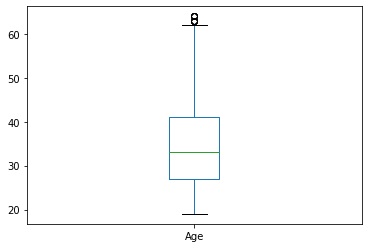

In [77]:
plot_boxplot(df_cleaned, 'Age')

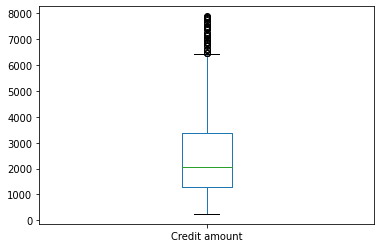

In [78]:
plot_boxplot(df_cleaned, 'Credit amount')

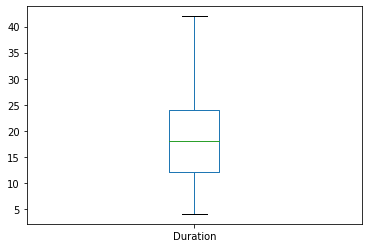

In [79]:
plot_boxplot(df_cleaned, 'Duration')

In [80]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,862.0,34.698376,10.264763,19.0,27.00,33.0,41.0,64.0
Credit amount,862.0,2531.432715,1663.627810,250.0,1308.25,2066.5,3355.0,7882.0
Duration,862.0,18.116009,8.690069,4.0,12.00,18.0,24.0,42.0


Setelah dibandingkan, hasil pengklasteran menggunakan data awal lebih baik dibandingkan menggunakan data yang telah dibersihkan. Pada pengklasteran yang menggunakan data awal lebih menunjukkan kekhas-an karakteristik masing-masing klaster. Sehingga digunakan data awal saja.


---



### Scatter 3D

Text(0.5, 0, 'Age')

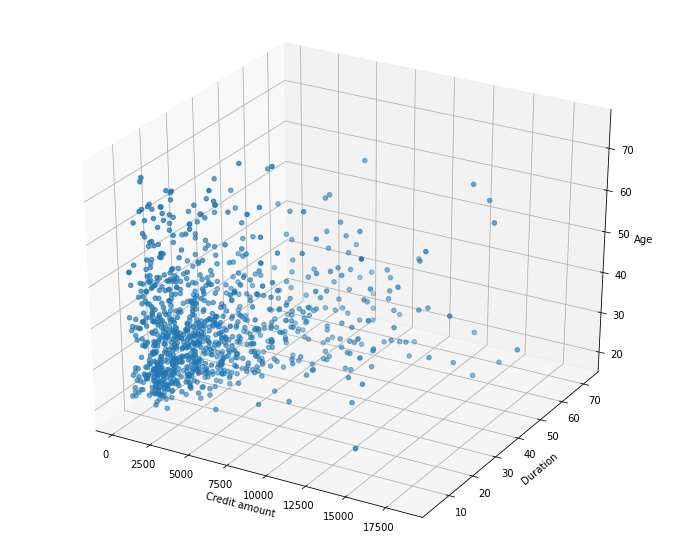

In [81]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_num["Credit amount"], df_num["Duration"], df_num["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

## 2.2 Data Preparation

In [82]:
# data yang digunakan untuk proses clustering
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df_cust.loc[:,selected_cols]

In [83]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

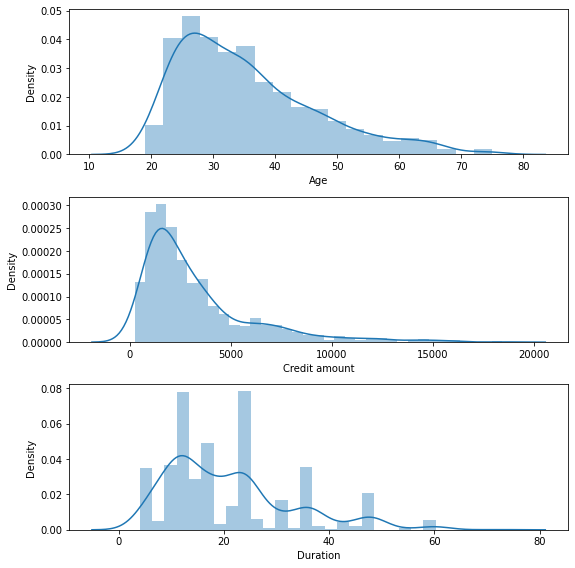

In [84]:
distributions(cluster_data) #distribusi data yang akan dilakukan pengklasteran

**Insight**

Perhatikan histogram distribusi data di atas. Dapat dilihat bahwa bentuk data condong ke kanan (right skewness). 
Untuk mendapatkan hasil yang lebih baik, maka akan dilakukan normalisasi menggunakan transformasi log dan standar scaler. 


---



#### 2.2.1 Normalisasi Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

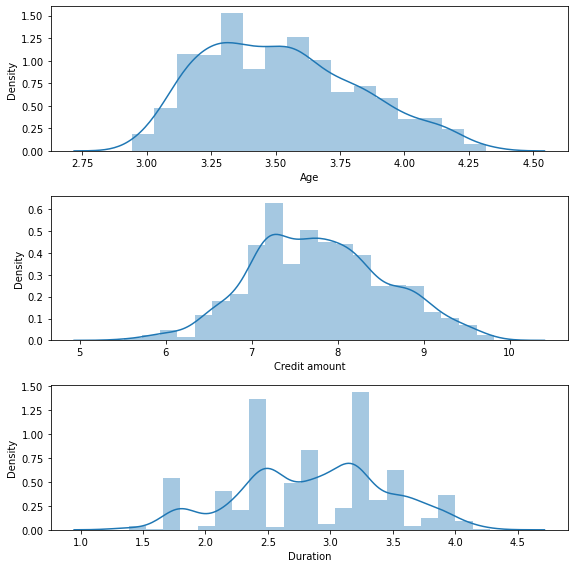

In [85]:
# Normalisasi menggunakan transformasi log
X_log = np.log(cluster_data)
distributions(X_log)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

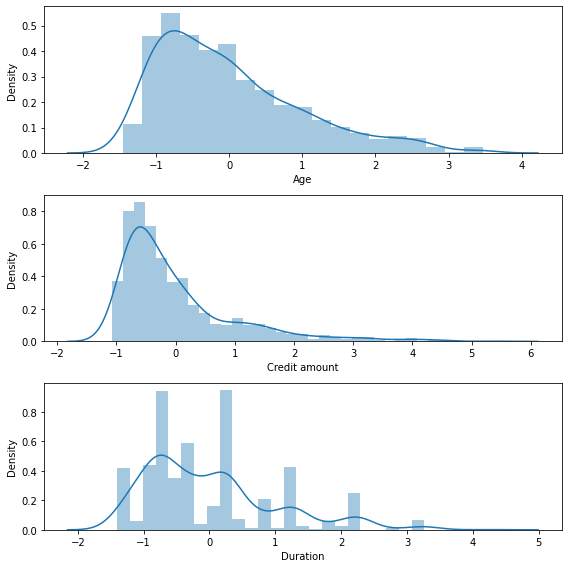

In [86]:
# Normalisasi menggunakan Standard Scaler
scaler = StandardScaler()
scaler.fit(cluster_data)
X_scaled = pd.DataFrame(scaler.transform(cluster_data),columns=cluster_data.columns)

distributions(X_scaled)

**Insight**
Dari kedua metode yang dilakukan dapat dilihat bahwa metode Normalisasi Transformasi Log memberikan hasil yang lebih normal dengan grafik yang tidak terlalu condong di satu sisi dibandingkan dengan hasil Normalisasi Standar Scaler. 


---




#### 2.2.2 Menentukan dan Mengkonfigurasi Fungsi K-Means

* Dalam tahap awal kita akan menentukan initial `k`, dimana kita akan coba membuat cluster dengan nilai `k=3,4,5`.

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

In [87]:
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_3.fit(X_log)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.051s


In [88]:
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_4.fit(X_log)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.133s


In [89]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(X_log)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.080s


In [90]:
K = 6
kmeans_6 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_6.fit(X_log)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.092s


In [91]:
df_num = df_num.assign(
    clusters_of_3=kmeans_3.predict(X_log),
    clusters_of_4=kmeans_4.predict(X_log),
    clusters_of_5=kmeans_5.predict(X_log),
    clusters_of_6=kmeans_6.predict(X_log),
)

with pd.option_context("display.max_columns", None):
    display(df_num.head())

,Age,Credit amount,Duration,clusters_of_3,clusters_of_4,clusters_of_5,clusters_of_6
0,67,1169,6,1,1,4,4
1,22,5951,48,0,0,0,3
2,49,2096,12,2,3,2,4
3,45,7882,42,0,0,0,3
4,53,4870,24,0,0,3,0


#### 2.2.3 Evaluasi Model: Cluster Cardinality

Untuk melihat jumlah anggota jika dibuat sebanyak K cluster. Di sini diambil conoth K=3,4,5, dan 6.


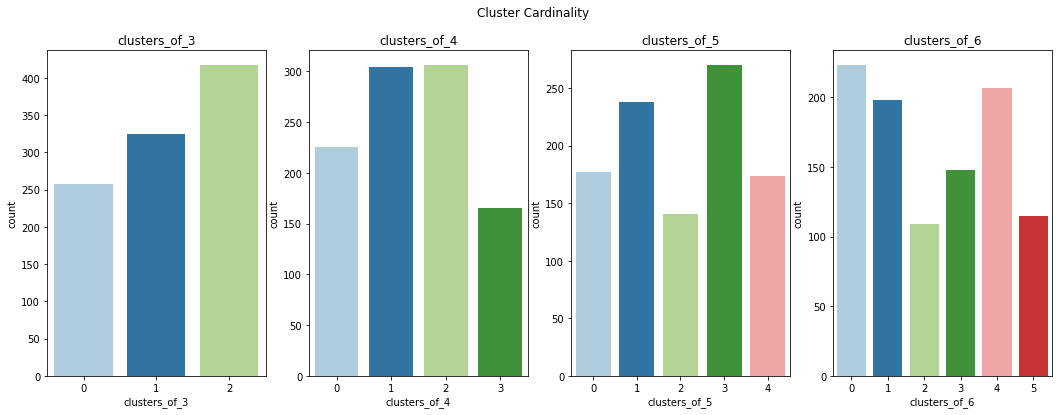

In [92]:

fig, axis = plt.subplots(1, 4, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_3","clusters_of_4","clusters_of_5","clusters_of_6"]):
    sns.countplot(x=preds, data=df_num, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()


**Insight**

#### 2.2.4 Evaluasi Model: Cluster Magnitude
Cluster magnitude adalah jarak rata-rata antara anggota cluster dengan centroid cluster.

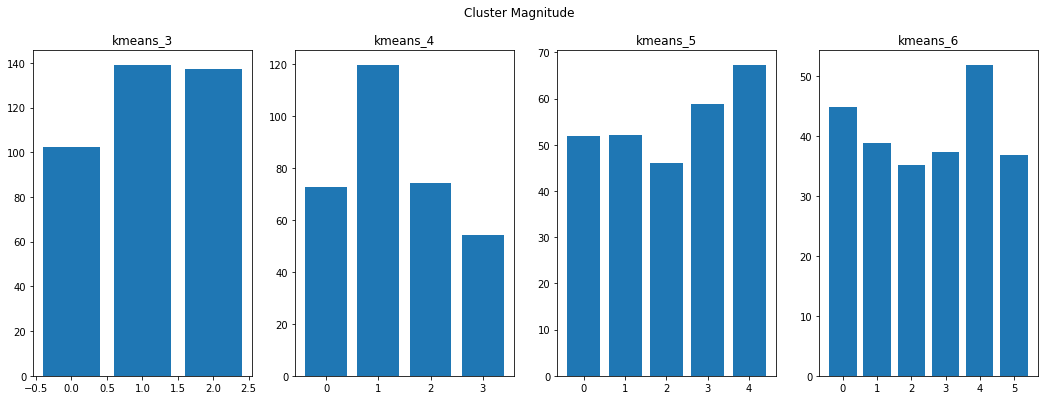

In [93]:
fig, axis = plt.subplots(1, 4, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_3,kmeans_4,kmeans_5, kmeans_6],["kmeans_3","kmeans_4","kmeans_5", "kmeans_6"]):
    distances = model.transform(X_log)
    preds = model.predict(X_log)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

# 3. Modeling: Clustering with KMeans

## 3.1 Penentuan Jumlah K: Elbow method

In [94]:
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_log)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.010s
Clustering with n_clusters=2
Done clustering in 0.026s
Clustering with n_clusters=3
Done clustering in 0.036s
Clustering with n_clusters=4
Done clustering in 0.051s
Clustering with n_clusters=5
Done clustering in 0.061s
Clustering with n_clusters=6
Done clustering in 0.078s
Clustering with n_clusters=7
Done clustering in 0.074s
Clustering with n_clusters=8
Done clustering in 0.113s
Clustering with n_clusters=9
Done clustering in 0.098s
Clustering with n_clusters=10
Done clustering in 0.103s
Clustering with n_clusters=11
Done clustering in 0.113s
Clustering with n_clusters=12
Done clustering in 0.146s
Clustering with n_clusters=13
Done clustering in 0.135s
Clustering with n_clusters=14
Done clustering in 0.141s
Clustering with n_clusters=15
Done clustering in 0.145s
Clustering with n_clusters=16
Done clustering in 0.166s
Clustering with n_clusters=17
Done clustering in 0.168s
Clustering with n_clusters=18
Done clustering in 0.138s
C

In [95]:
ssd

[1030.7320531903918,
 506.67615868524854,
 378.5406278943228,
 321.1342118028135,
 276.129324288216,
 244.81323194859303,
 224.41760076765632,
 207.668704708584,
 191.9791891513318,
 178.06373339129777,
 165.46801748353926,
 154.86840391388068,
 147.02335170627134,
 141.49117372279864,
 133.8578252289132,
 128.375957782452,
 122.67681571143217,
 118.71132325951345,
 113.6887462308455]

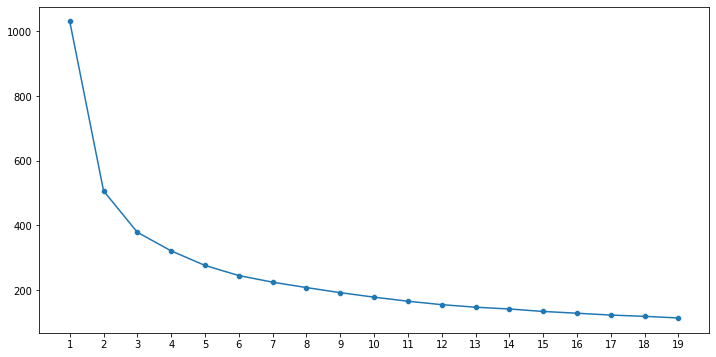

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()

## 3.2 Penentuan Jumlah K: Sillhouette Method

In [97]:
# Code for the whole dataset
silhouette_scores = []

# may take a longer time to run
for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_log)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_log, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.037s
Calculating silhouette coefficient..
Done calculating in 0.024s
Clustering with n_clusters=3
Done clustering in 0.144s
Calculating silhouette coefficient..
Done calculating in 0.035s
Clustering with n_clusters=4
Done clustering in 0.100s
Calculating silhouette coefficient..
Done calculating in 0.022s
Clustering with n_clusters=5
Done clustering in 0.114s
Calculating silhouette coefficient..
Done calculating in 0.045s
Clustering with n_clusters=6
Done clustering in 0.142s
Calculating silhouette coefficient..
Done calculating in 0.034s
Clustering with n_clusters=7
Done clustering in 0.152s
Calculating silhouette coefficient..
Done calculating in 0.030s
Clustering with n_clusters=8
Done clustering in 0.126s
Calculating silhouette coefficient..
Done calculating in 0.021s
Clustering with n_clusters=9
Done clustering in 0.137s
Calculating silhouette coefficient..
Done calculating in 0.020s
Clustering with n_clusters=10
Done clustering in

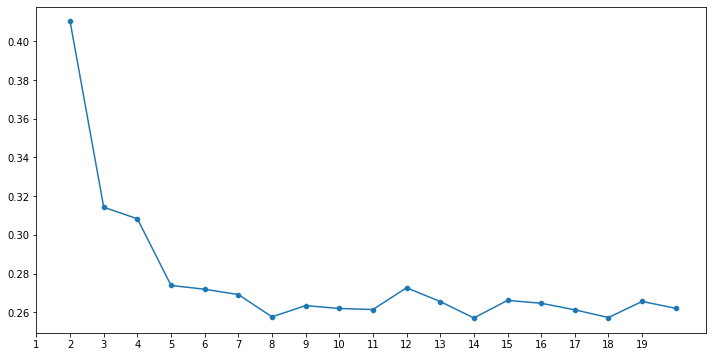

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

**Insight**
Dari kedua grafik di samping dapat  diketahui bahwa penggunaan Elbow Method menunjukkan perubahan yang landai terjadi di angka  4. 
Pada grafik Silhouette Method menunjukkan nilai tertinggi pada angka 2, namun pada grafik Elbow Method perubahan pada angka 2 terlalu curam. Sehingga dipilih angka 4 untuk menentukan jumlah K-means.


---



---



## 3.3 Clustering


Langkah selanjutnya adalah pemusatan dan pen-skalaan variabel dimana hal ini diperlukan oleh algoritma KMeans. Akan digunakan StandardScaler.

In [99]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(X_log)

In [100]:
kmeans_sel = KMeans(n_clusters=4, random_state=11).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
clustered_data

,Age,Credit amount,Duration,Cluster
0,67,1169,6,1
1,22,5951,48,0
2,49,2096,12,1
3,45,7882,42,0
4,53,4870,24,0
...,...,...,...,...
995,31,1736,12,2
996,40,3857,30,0
997,38,804,12,2
998,23,1845,45,3


In [101]:
clustered_data.tail()

,Age,Credit amount,Duration,Cluster
995,31,1736,12,2
996,40,3857,30,0
997,38,804,12,2
998,23,1845,45,3
999,27,4576,45,0


In [102]:
final_cluster = clustered_data.groupby(['Cluster']).mean().round(1)
final_cluster

,Age,Credit amount,Duration
Cluster,,,
0,36.8,7081.8,36.8
1,50.0,2169.4,14.8
2,29.1,1351.5,10.5
3,28.5,2838.3,22.3


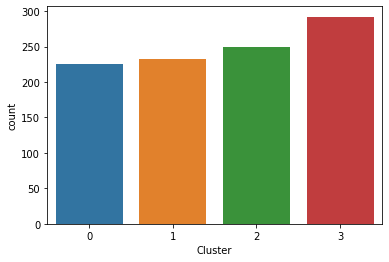

In [103]:
sns.countplot(x='Cluster', data=clustered_data)
plt.xticks()
plt.show()

# 4. Kesimpulan dan Interpretasi Hasil

Dari pengklasteran yang telah dilakukan menghasilkan empat klaster. Karakteristik masing-masing klasternya adalah sebagai berikut:


1.   Cluster ke-0 (indeks 0): Kelompok usia paruh baya, jumlah kredit sangat besar, durasi sangat lama

2.   Cluster ke-1 (indeks 1): Kelompok usia pra- pensiun, jumlah kredit sedikit, durasi singkat
3. Cluster ke-2 (indeks 2):Kelompok usia pekerja awal, jumlah kredit sangat sedikit, durasi sangat singkat
4. Cluster ke-3 (indeks 3): Kelompok usia pekerja awal, jumlah kredit besar, durasi lama 

